In [16]:
#The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cust_df = pd.read_csv('Ecommerce Customers')

cust_df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [17]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [18]:
cust_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


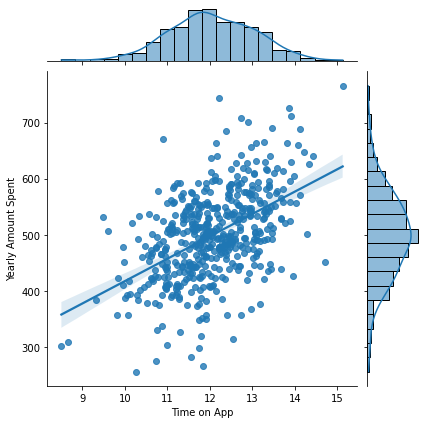

In [25]:
sns.jointplot(data = cust_df, x = 'Time on App', y = 'Yearly Amount Spent',kind = 'reg')

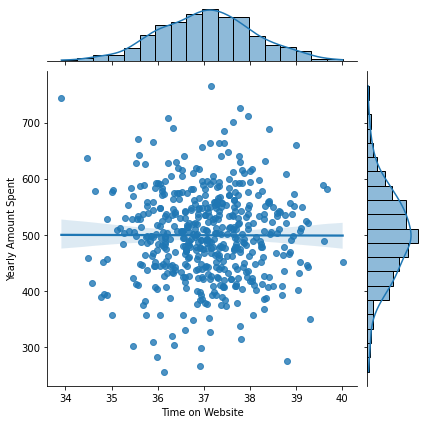

In [26]:
sns.jointplot(data = cust_df, x = 'Time on Website', y = 'Yearly Amount Spent', kind = 'reg')

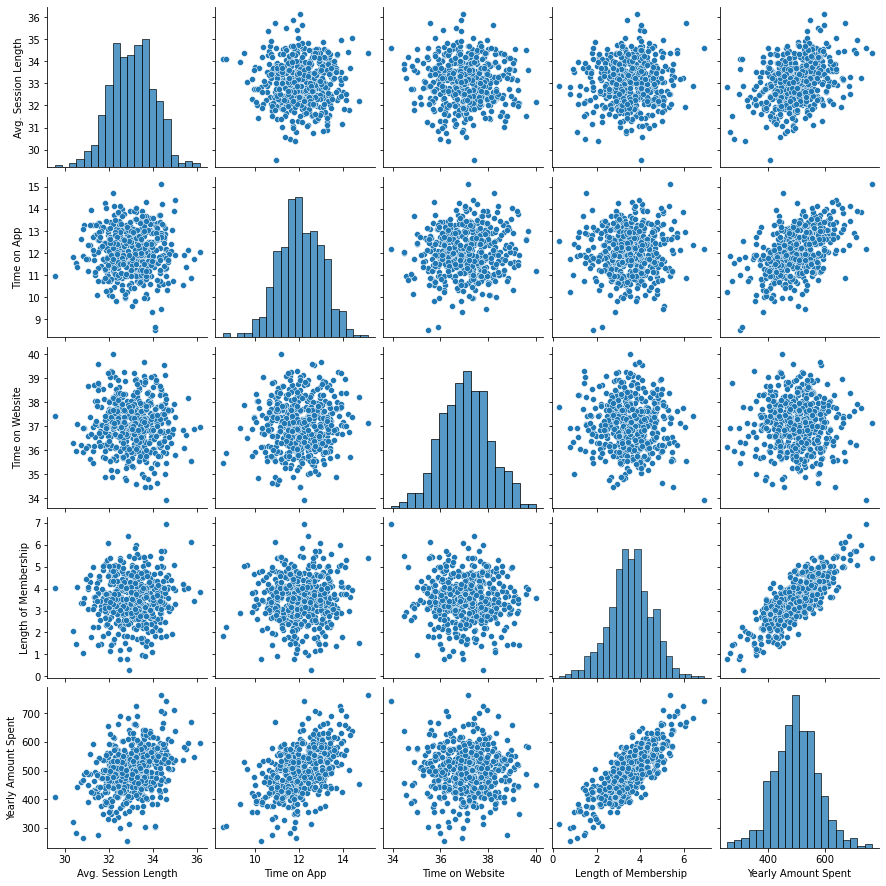

In [27]:
sns.pairplot(cust_df) #Length of Membership is the most correlated data with Yearly Amout Spent

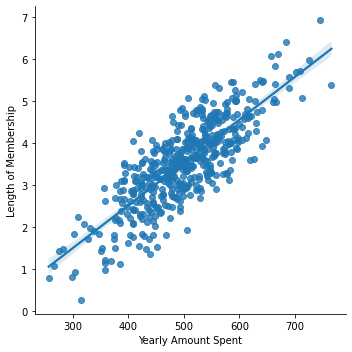

In [28]:
sns.lmplot(data = cust_df, x = 'Yearly Amount Spent',y = 'Length of Membership') #boom 

In [29]:
cust_df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [30]:
X = cust_df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = cust_df['Yearly Amount Spent'] #y is what you want to predict

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X_train, y_train,)

LinearRegression()

In [37]:
lm.coef_ #coefficients 

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [39]:
#Testing the Predicitions
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

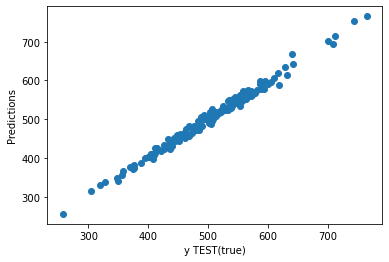

In [44]:
plt.scatter(y_test,predictions)
plt.xlabel('y TEST(true)')
plt.ylabel('Predictions')

In [51]:
#Evaluating the Model
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test,predictions) ,'%', metrics.mean_absolute_percentage_error(y_test,predictions))
print('MSE', metrics.mean_squared_error(y_test,predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  7.2281486534308295 % 0.014567988642853991
MSE 79.81305165097444
RMSE 8.933815066978633
